In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
from utils import *
from Bio import AlignIO
from Bio import Seq
import collections



In [57]:
def getSeq(ID, align):
    for seq in align:
        if ID in seq.id:
            return(seq)
    return('failure')

def seqPosFromAliPos(ID, align,offset):
    seq = getSeq(ID, align)
    mapping = [0]*len(seq)
    j = offset
    for i, res in enumerate(seq.seq):
        if res!='-':
            mapping[i]=j
            j+=1
        else:
            mapping[i]=-1
    return(mapping)

def aliPosFromSeqPos(pos,mapping):
    return(mapping.index(pos))

def getConserved(alignInFile,alignFormat,ID,ref,IDoff,refoff):
    align = AlignIO.read(alignInFile,alignFormat)
    conserved=[]
    refNum = seqPosFromAliPos(ref, align,refoff)
    mapping = seqPosFromAliPos(ID, align,IDoff)
    for i in range(align.get_alignment_length()):
        letters = collections.Counter(align[:,i])
#         if ((letters.most_common()[0][0]!='-')&(letters.most_common()[0][1]/len(align[:,i])>0.6)):
        conserved.append({'AAnum dabA2':mapping[i]+1,
                          'AAnum dabA1':refNum[i]+1,
                          'conservedResi':letters.most_common()[0][0],
                          'percent ID':letters.most_common()[0][1]/len(align[:,i])})
    return(np.array(conserved))

In [38]:
infile = "../data/msa/PF10070_ncbi.txt"
align = AlignIO.read(infile, "fasta")
print(align)

SingleLetterAlphabet() alignment with 4781 rows and 1980 columns
VQLAGEVIAQYWPMR-TFIHHNPLHGL--E-SLPFEQAVQ---H...GWV WP_053380624/21-1043
VELAGEAISSYWPMR-TFIHHNPLHGL--E-ELPFGPAVK---R...EWV WP_013248325/20-1048
VELAGEAISSYWPMR-TFIHHNPLHGL--E-DLPFGQAVK---R...EWV WP_080878007/20-1048
-QLAGECVSQYWPMR-TFIHHNPLHGL--E-GMPFELAVE---H...GWI OYT20765/23-1041
-QLAGECVSQYWPMR-TFIHHNPLHGL--E-RMPFELAVE---H...GWI WP_090744791/23-1041
-RVAGEITGTYWPMR-TFIHHNPLHGL--E-ELPFHDAIQ---R...EWV WP_083448025/25-1065
-KLASESVAPYWPMR-TFIHHNPLHEL--E-SRSFHEAVQ---R...RWV OLE42792/18-1077
VQMAGEPIPFFWPMR-TFIHHNPLHGL--E-HMPFEQATT---E...GWI WP_081662595/15-1000
-KLASESVAPYWPMR-TFIHHNPLHEL--E-SRSFHEAVQ---R...RWV OLC41483/18-1077
-SLAGEVIPRVWPMQ-TIIARNPLQGL--E-DQKFEDAVE---R...QWL OYT24854/43-1071
-SLAGEVIPRVWPMQ-TIIARNPLQGL--E-DQKFEDAVE---R...QWL SLM42748/24-1052
-SLAGEVIPRVWPMQ-TIIARNPLQGL--E-DQKFEDAVE---R...QWL WP_080878002/43-1071
VNLAGETISYFWPMK-TFIHHNPLHGL--E-EMSFEKAIK---E...QWI WP_005005277/24-1058
VNLAGEVVARLWPMR-TFI

In [71]:
len(align)

4781

In [39]:
dabA2 = 'WP_012823110'
getSeq(dabA2,align)

SeqRecord(seq=Seq('IDKACLRIAPIWPLD-SFVAVNPYLGL--I-DQPFDTVGR---YLEQTVGESLF...RWM', SingleLetterAlphabet()), id='WP_012823110/21-802', name='WP_012823110/21-802', description='WP_012823110/21-802', dbxrefs=[])

In [40]:
dabA1 = 'WP_012823786'
getSeq(dabA1,align)

SeqRecord(seq=Seq('VHMAAEPIPNFWPMR-TFIHHNPLHGL--E-HLPFEQAVR---QGEKLFHARGF...GWI', SingleLetterAlphabet()), id='WP_012823786/16-1003', name='WP_012823786/16-1003', description='WP_012823786/16-1003', dbxrefs=[])

In [58]:
identity = getConserved(infile,'fasta',dabA2,dabA1,20,15)

In [59]:
goodResi = {351,353,524,539}
activesite = identity[[x['AAnum dabA2'] in goodResi for x in identity]]
activesite

array([{'AAnum dabA2': 351, 'AAnum dabA1': 462, 'conservedResi': 'C', 'percent ID': 0.9192637523530642},
       {'AAnum dabA2': 353, 'AAnum dabA1': 464, 'conservedResi': 'D', 'percent ID': 0.9186362685630621},
       {'AAnum dabA2': 524, 'AAnum dabA1': 721, 'conservedResi': 'H', 'percent ID': 0.9236561388830788},
       {'AAnum dabA2': 539, 'AAnum dabA1': 736, 'conservedResi': 'C', 'percent ID': 0.9234469776197448}],
      dtype=object)

In [ ]:
goodResi = {351,353,524,539}
activesite = identity[[x['percent ID']  goodResi for x in identity]]
activesite

In [67]:
conserve_df = pd.DataFrame.from_records(identity)
conserve_df=conserve_df.sort_values('AAnum dabA2')

(10, 800)

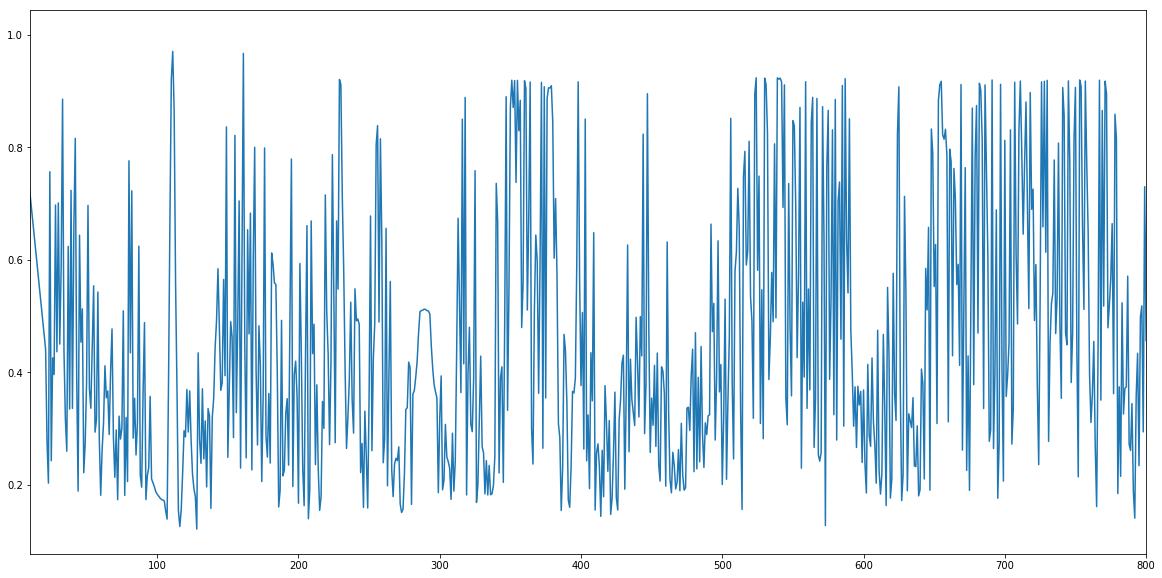

In [70]:
plt.figure(figsize=(20,10))
plt.plot(conserve_df['AAnum dabA2'],conserve_df['percent ID'])
plt.xlim(10,800)